### Installation and Setting Up

In [ ]:
!pip install PyWavelets
import pywt
import pywt.data
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.color import rgb2gray

from google.colab import drive
drive.mount('/content/drive')

In [ ]:
path = '/content/drive/MyDrive/png2jpg/img13.jpg'

import os
if not os.path.exists(path):
    raise FileNotFoundError(f"Image at {path} not found!")

img = mpimg.imread(path)
plt.figure()
plt.imshow(img, cmap = 'gray')

### Single-Level Decomposition

In [ ]:
coeffs2 = pywt.dwt2(img, 'haar', mode = 'periodization') #1 Level DWT
cA, (cH, cV, cD) = coeffs2 # Extracting Coefficients

imgr = pywt.idwt2(coeffs2, 'db3', mode = 'periodization')
imgr = np.uint8(imgr)

print("Shape of cA:", cA.shape)

In [ ]:
# Plotting Wavelet Coefficients

plt.figure(figsize=(6,12))
plt.imshow(cA.mean(axis=2), cmap = 'gray')
# plt.title('cA: Approximation Coefficient', fontsize = 10)

plt.figure(figsize=(12,12))
plt.imshow(cH.mean(axis=2), cmap = 'gray')
# plt.title('cH: Horizontal Detailed', fontsize = 10)

plt.figure(figsize=(12,12))
plt.imshow(cV.mean(axis=2), cmap = 'gray')
# plt.title('cV: Vertical Detailed Coefficient', fontsize = 10)

plt.figure(figsize=(12,12))
plt.imshow(cD.mean(axis=2), cmap = 'gray')
# plt.title('cD: Diagonal Detailed Coefficient', fontsize = 10)

plt.show()

#Reconstructed Image
plt.figure()
plt.imshow(imgr,cmap= 'gray')
plt.title('Reconstructed Image', fontsize = 10)

### Level 2 Decomposition

In [ ]:
C = pywt.wavedec2(img,'db5',mode = 'periodization', level = 2) # 2 Level DWT
imgr2 = pywt.waverec2(C, 'db5', mode = 'periodization') # 2 Level IIDWT
imgr2 = np.uint8(imgr2)

cA2 = C[0] # Approximation Coefficients
(cH1, cV1, cD1) = C[-1] # Detailed Coefficients at Level 1
(cH2, cV2, cD2) = C[-2] # Detailed Coefficients at Level 2

print("Shape of cA:", cA.shape)

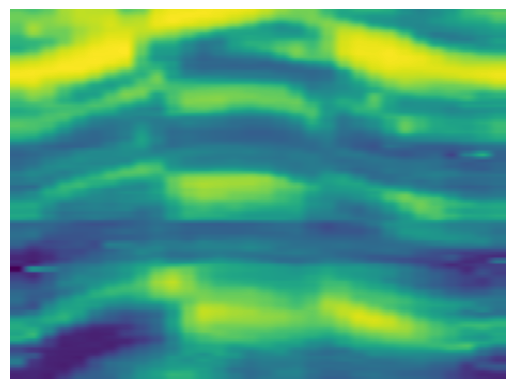

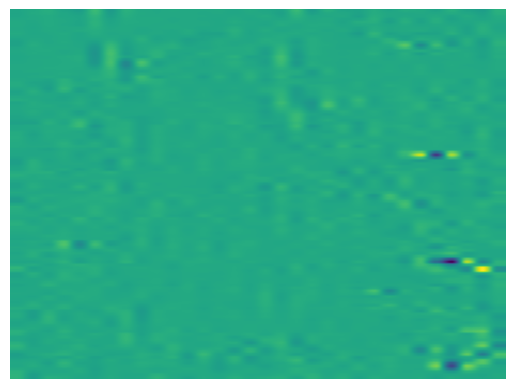

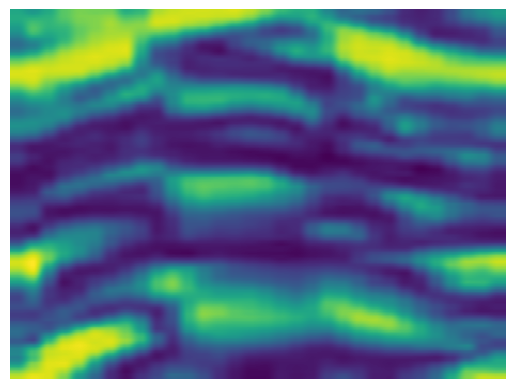

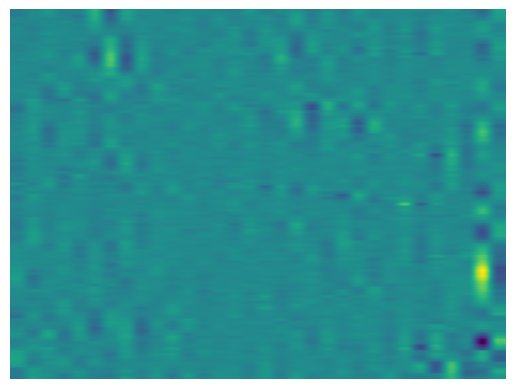

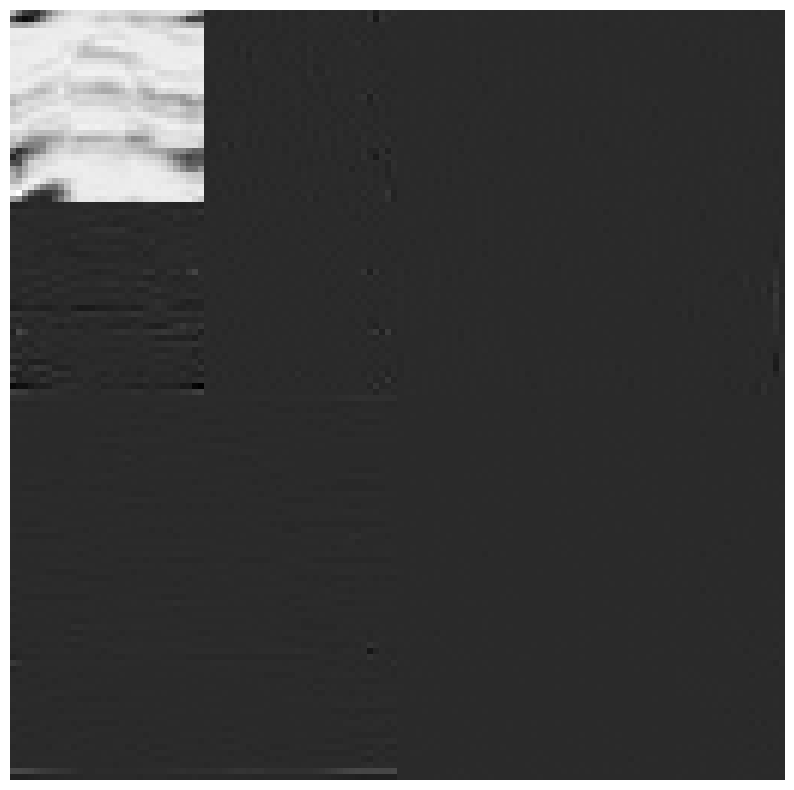

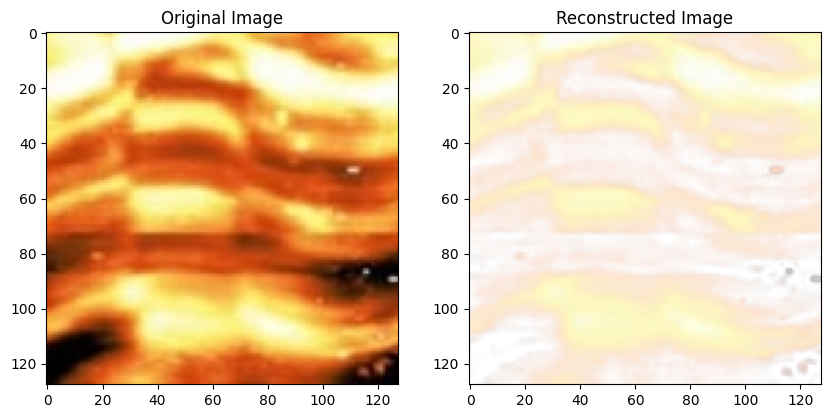

In [ ]:
from enum import auto
# Plotting Wavelet Coefficients

plt.figure()
# plt.subplot(2,2,1)
plt.imshow(cA2.mean(axis=2),  aspect='auto')
plt.axis('off')
# plt.title('cA2: Approximation Coefficient', fontsize = 10)

plt.figure()
# plt.subplot(2,2,2)
plt.imshow(cH2.mean(axis=2), aspect = 'auto')
plt.axis('off')
# plt.title('cH2: Horizontal Detailed', fontsize = 10)

plt.figure()
# plt.subplot(2,2,3)
plt.imshow(cV2.mean(axis=2),  aspect="auto")
plt.axis('off')
# plt.title('cV2: Vertical Detailed Coefficient', fontsize = 10)

plt.figure()
plt.imshow(cD2.mean(axis=2),  aspect="auto")
plt.axis('off')
# plt.title('cD2: Diagonal Detailed Coefficient', fontsize = 10)
# plt.subplots_adjust(wspace=0.1, hspace=0.3)
plt.show()

#Plotting all coefficents as one matrix
C2 = pywt.wavedec2(img[:,:,0],'db5',mode = 'periodization', level =2) # 2 Level DWT
arr, coeff_slices = pywt.coeffs_to_array(C2) #extracting all coefficients in concatenated matrix
plt.figure(figsize=(10,10))
plt.imshow(arr,cmap = 'gray', aspect='auto')
plt.axis('off')
# plt.title('All Wavelet Coefficients Upto Level 2', fontsize = 10)

#Reconstructed Image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(imgr2, cmap='gray')
plt.title("Reconstructed Image")
plt.show()



# plt.figure()
# plt.imshow(imgr2,cmap= 'gray')
# plt.axis('off')
# # plt.title('Reconstructed Image', fontsize = 10)

### DWT on Multiple Images from Dataset - Level 2 Decomposition

In [ ]:
!pip install PyWavelets
import pywt
import pywt.data
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from google.colab import drive
from skimage.color import rgb2gray

# Mount Google Drive to access dataset
drive.mount('/content/drive')

# Define the path to the folder containing images
folder_path = '/content/drive/MyDrive/png2jpg/'  # Update with your folder path

# Function to plot the wavelet coefficients
def plot_wavelet_coefficients(cA, cH, cV, cD, level=1):
    # Plotting Approximation Coefficients
    plt.figure(figsize=(6, 12))
    plt.imshow(cA, cmap='gray')
    plt.title(f'cA: Approximation Coefficients (Level {level})', fontsize=10)

    # Plotting Horizontal Detail Coefficients
    plt.figure(figsize=(12, 12))
    plt.imshow(cH, cmap='gray')
    plt.title(f'cH: Horizontal Detail Coefficients (Level {level})', fontsize=10)

    # Plotting Vertical Detail Coefficients
    plt.figure(figsize=(12, 12))
    plt.imshow(cV, cmap='gray')
    plt.title(f'cV: Vertical Detail Coefficients (Level {level})', fontsize=10)

    # Plotting Diagonal Detail Coefficients
    plt.figure(figsize=(12, 12))
    plt.imshow(cD, cmap='gray')
    plt.title(f'cD: Diagonal Detail Coefficients (Level {level})', fontsize=10)

    plt.show()

# Function for Two-Level DWT
def perform_two_level_dwt(img, wavelet='db5'):
    # Perform 2-Level DWT
    C = pywt.wavedec2(img, wavelet, mode='periodization', level=2)

    # Extracting the coefficients for 2 levels
    cA2 = C[0]  # Approximation Coefficients at Level 2
    (cH2, cV2, cD2) = C[-2]  # Detailed Coefficients at Level 2
    (cH1, cV1, cD1) = C[-1]  # Detailed Coefficients at Level 1

    # Reconstruct the image using Inverse DWT
    imgr2 = pywt.waverec2(C, wavelet, mode='periodization')
    imgr2 = np.uint8(imgr2)

    return cA2, cH2, cV2, cD2, imgr2

# Function to process a single image for both single-level and two-level DWT
def process_image(img, wavelet='db5'):
    try:
        # Convert to grayscale if the image has more than one channel (e.g., RGB or RGBA)
        if img.ndim == 3:
            img = rgb2gray(img)

        # Single-Level DWT
        coeffs2 = pywt.dwt2(img, wavelet, mode='periodization')
        cA, (cH, cV, cD) = coeffs2
        plot_wavelet_coefficients(cA, cH, cV, cD, level=1)

        # Two-Level DWT
        cA2, cH2, cV2, cD2, imgr2 = perform_two_level_dwt(img, wavelet)
        plot_wavelet_coefficients(cA2, cH2, cV2, cD2, level=2)

        # Display the reconstructed image after two-level DWT
        plt.figure()
        plt.imshow(imgr2, cmap='gray')
        plt.title('Reconstructed Image (Level 2)', fontsize=10)
        plt.show()

    except Exception as e:
        print(f"Error processing image: {e}")

# Function to process multiple images in a folder
def process_images_from_folder(folder_path, wavelet='db5'):
    try:
        # List all files in the folder
        img_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

        for img_file in img_files:
            # Construct full path to the image file
            img_path = os.path.join(folder_path, img_file)
            img = mpimg.imread(img_path)

            # Process the image
            print(f"Processing {img_file}...")
            process_image(img, wavelet)

    except Exception as e:
        print(f"Error processing images in folder: {e}")

# Call the function to process all images in the folder
process_images_from_folder(folder_path, wavelet='haar')  # You can change wavelet to 'db5' or others
